<a href="https://colab.research.google.com/github/manikur/R-programming/blob/main/Google_stockprice_mathclasstutor_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
!pip install yfinance

In [105]:
import pandas as pd
import numpy as np
import yfinance as yf

In [106]:
df = yf.download('GOOG',
 start='2020-01-01',
 end='2022-04-18',
 progress=False)

In [107]:
df.tail(9)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-04,2816.489990,2880.875000,2816.489990,2872.850098,2872.850098,953800
2022-04-05,2867.989990,2871.800049,2818.870117,2821.260010,2821.260010,962800
2022-04-06,2783.229980,2796.969971,2728.362061,2743.520020,2743.520020,1178700
2022-04-07,2732.360107,2754.030029,2697.145020,2729.300049,2729.300049,972400
2022-04-08,2725.000000,2725.000000,2675.050049,2680.209961,2680.209961,821000
2022-04-11,2658.000000,2658.783936,2592.350098,2595.929932,2595.929932,1209400
2022-04-12,2648.469971,2648.469971,2551.520020,2567.489990,2567.489990,1150200
2022-04-13,2572.530029,2613.114990,2568.771973,2605.719971,2605.719971,977100
2022-04-14,2612.989990,2614.205078,2542.229980,2545.060059,2545.060059,1171400


In [108]:
import matplotlib.pyplot as plt

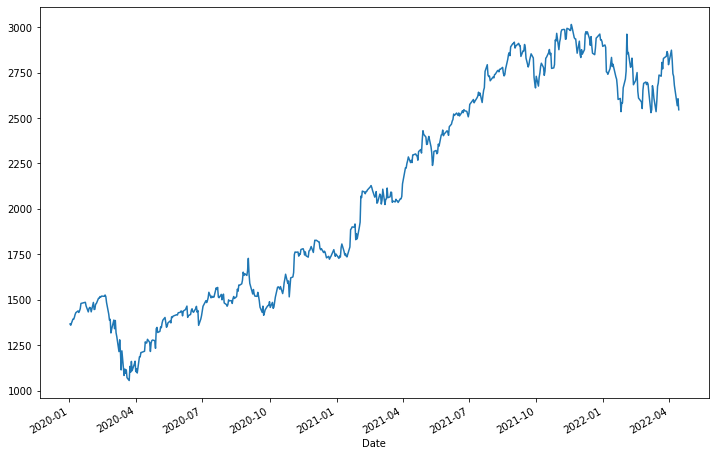

In [109]:
df['Close'].plot(figsize=(12,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f007bc67d50>,
      dtype=object)

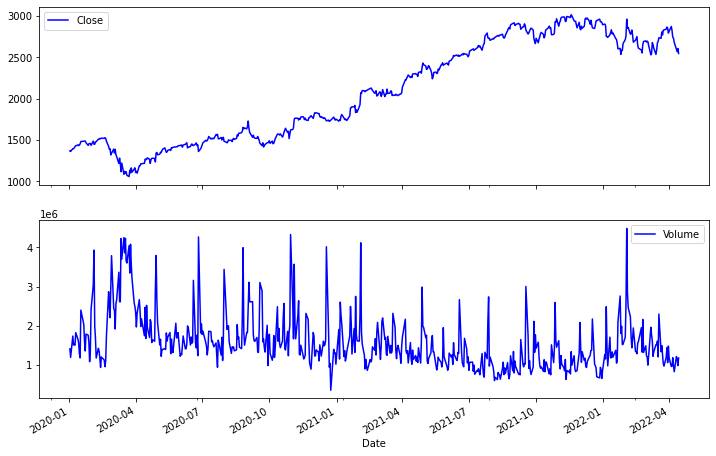

In [110]:
df[['Close', 'Volume']].plot(subplots=True, style='b',
figsize=(12, 8))

In [111]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,2084.235298,2106.853542,2062.208870,2084.966664,2084.966664,1.571972e+06
std,604.266332,606.104890,599.603689,602.249502,602.249502,7.014091e+05
min,1056.510010,1071.319946,1013.536011,1056.619995,1056.619995,3.468000e+05
25%,1494.699951,1512.214966,1483.500000,1496.099976,1496.099976,1.113300e+06
50%,2062.300049,2082.010010,2038.130005,2055.540039,2055.540039,1.404500e+06
75%,2713.989990,2739.000000,2680.000000,2719.790039,2719.790039,1.800400e+06
max,3037.270020,3042.000000,2997.750000,3014.179932,3014.179932,4.487500e+06


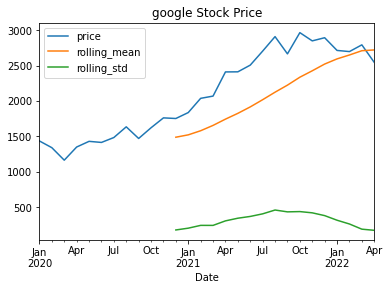

In [113]:
WINDOW_SIZE = 12
df['rolling_mean'] = df.price.rolling(window=WINDOW_SIZE).mean()
df['rolling_std'] = df.price.rolling(window=WINDOW_SIZE).std()
df.plot(title='google Stock Price')

In [114]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

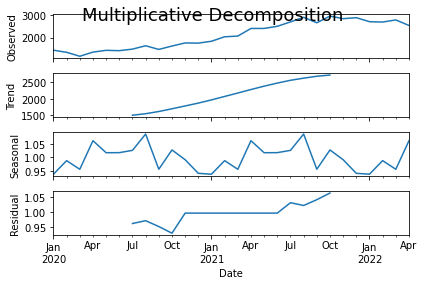

In [115]:
decomposition_results = seasonal_decompose(df.price,
 model='multiplicative')
decomposition_results.plot() \
 .suptitle('Multiplicative Decomposition',
 fontsize=18);

In [133]:
import pandas as pd
import seaborn as sns
from fbprophet import Prophet
import matplotlib.pyplot as plt


In [122]:
df = yf.download('GOOG',
 start='2010-01-01',
 end='2022-04-18',
 adjusted=True,
 progress=False)

In [123]:
df = df.loc[:, ['Adj Close']]

In [125]:
df.reset_index(drop=False, inplace=True)
df.rename(columns={'Date': 'ds', 'Adj Close': 'y'}, inplace=True)


In [126]:
train_indices = df.ds.apply(lambda x: x.year) < 2022
df_train = df.loc[train_indices].dropna()
df_test = df.loc[~train_indices].reset_index(drop=True)

In [127]:
model_prophet = Prophet(seasonality_mode='additive')
model_prophet.add_seasonality(name='monthly', period=30.5,fourier_order=5)
model_prophet.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


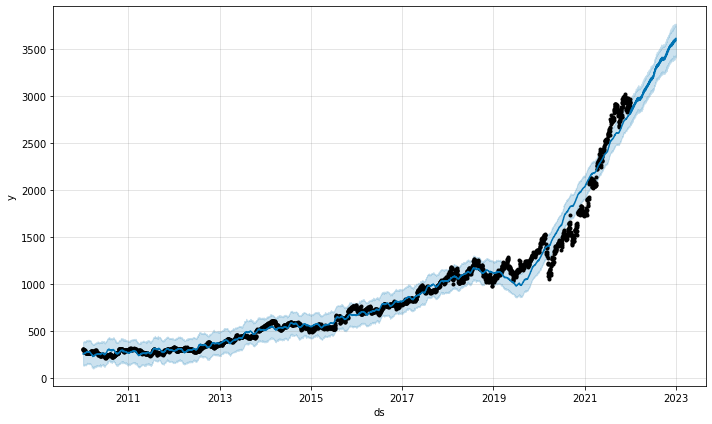

In [128]:
df_future = model_prophet.make_future_dataframe(periods=365)
df_pred = model_prophet.predict(df_future)
model_prophet.plot(df_pred);

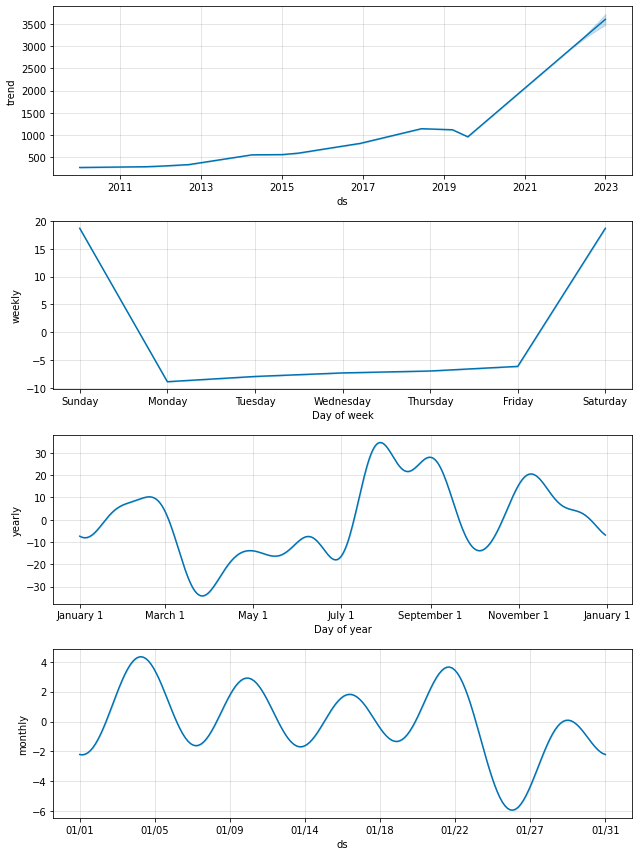

In [130]:
model_prophet.plot_components(df_pred);

In [131]:
selected_columns = ['ds', 'yhat_lower', 'yhat_upper', 'yhat']

In [132]:
df_pred = df_pred.loc[:, selected_columns].reset_index(drop=True)
df_test = df_test.merge(df_pred, on=['ds'], how='left')
df_test.ds = pd.to_datetime(df_test.ds)
df_test.set_index('ds', inplace=True)

[Text(0, 0.5, 'Stock Price '),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Stock Price - actual vs. predicted')]

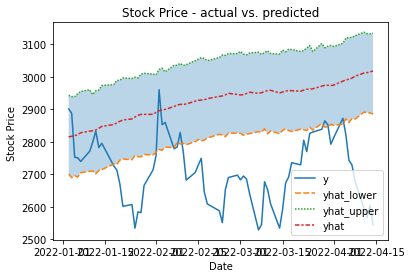

In [134]:
fig, ax = plt.subplots(1, 1)
ax = sns.lineplot(data=df_test[['y', 'yhat_lower', 'yhat_upper','yhat']])
ax.fill_between(df_test.index,
 df_test.yhat_lower,
 df_test.yhat_upper,
 alpha=0.3)
ax.set(title='Stock Price - actual vs. predicted',
 xlabel='Date',
 ylabel='Stock Price ')

In [135]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

In [136]:
def adf_test(x):
 indices = ['Test Statistic', 'p-value',
 '# of Lags Used', '# of Observations Used']
 adf_test = adfuller(x, autolag='AIC')
 results = pd.Series(adf_test[0:4], index=indices)
 for key, value in adf_test[4].items():
  results[f'Critical Value ({key})'] = value
 return results

In [137]:
adf_test(df.y)

Test Statistic               1.644663
p-value                      0.997986
# of Lags Used              23.000000
# of Observations Used    3069.000000
Critical Value (1%)         -3.432483
Critical Value (5%)         -2.862482
Critical Value (10%)        -2.567272
dtype: float64

In [138]:
def kpss_test(x, h0_type='c'):
 indices = ['Test Statistic', 'p-value', '# of Lags']
 kpss_test = kpss(x, regression=h0_type)
 results = pd.Series(kpss_test[0:3], index=indices)
 for key, value in kpss_test[3].items():
  results[f'Critical Value ({key})'] = value
 return results

In [139]:
kpss_test(df.y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value



Test Statistic            8.198812
p-value                   0.010000
# of Lags                29.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

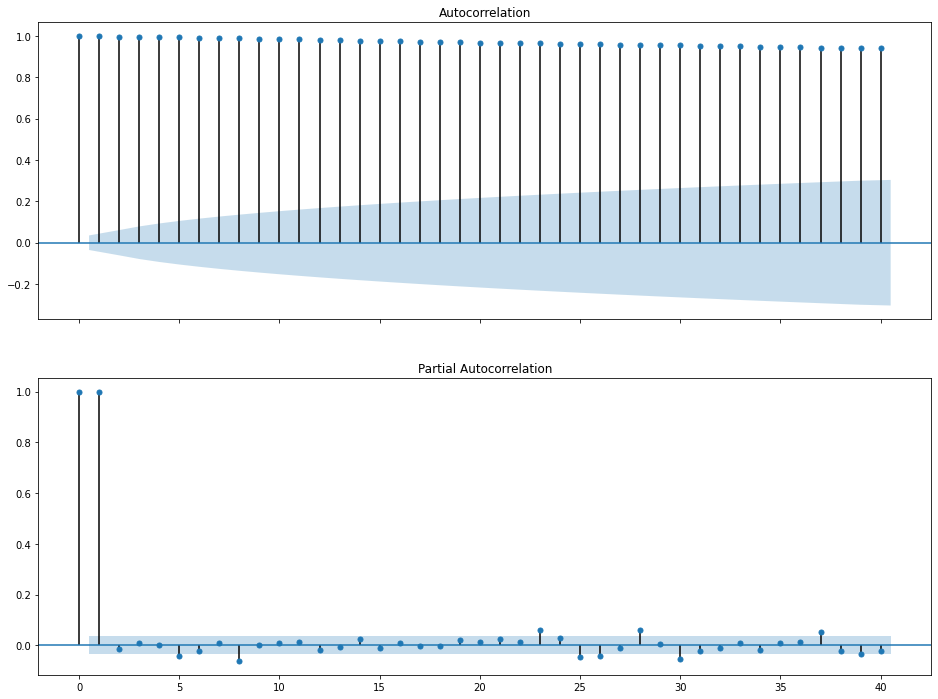

In [141]:
N_LAGS = 40
SIGNIFICANCE_LEVEL = 0.05
fig, ax = plt.subplots(2, 1, figsize=(16, 12), sharex=True)
plot_acf(df.y, ax=ax[0], lags=N_LAGS,
 alpha=SIGNIFICANCE_LEVEL)
plot_pacf(df.y, ax=ax[1], lags=N_LAGS,
 alpha=SIGNIFICANCE_LEVEL);